<a href="https://colab.research.google.com/github/sofienazzabi2/Deep-Learning-TP1/blob/main/DeepLearningTP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visualization of Synthetic Binary Classification Data**

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

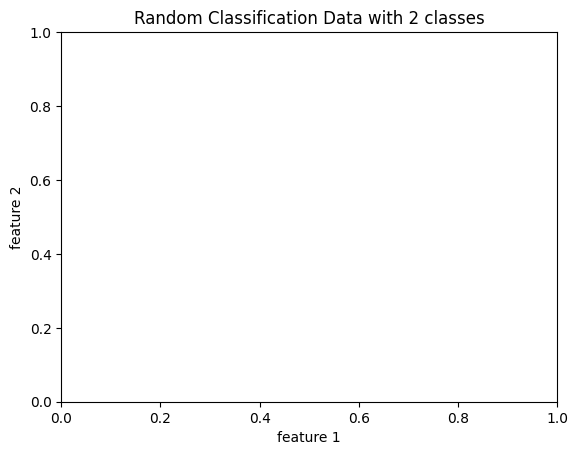

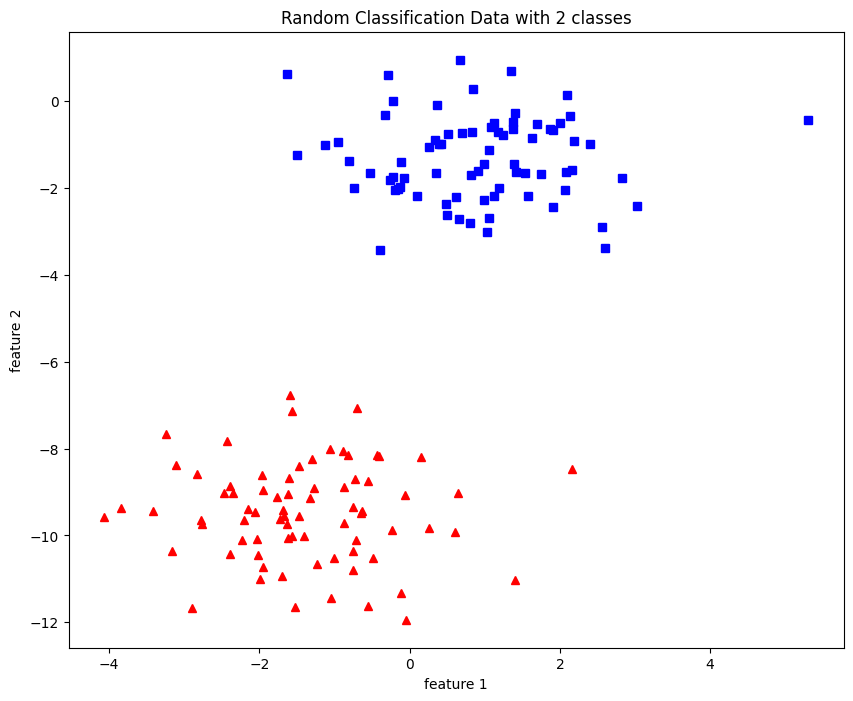

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

X, y = datasets.make_blobs (n_samples=150, n_features=2,
centers=2, cluster_std=1.05,

random_state=2)

#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [ ]:
def acti_func(z):
  if z>0:
    return 1
  else:
    return 0

Implementer l’algorithme de perceptron

In [ ]:
import numpy as np
def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    # m-> number of training examples
    # n-> number of features
    m, n = X.shape
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list = []
    # Training.
    for epoch in range(epochs):
        # variable to store #misclassified.
        n_miss = 0
        # looping for every example.
        for idx, x_i in enumerate(X):
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                # Update weights
                w += lr * (y[idx] - y_hat) * x_i
                # Incrementing by 1.
                n_miss += 1
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
    return w, n_miss_list

Tracez la limite de décision trouvée par votre algorithme.

In [ ]:
def plot_decision_boundary(X, y, w):
    # X --> Inputs
    # y --> labels/target
    # w --> parameters

    # Extract weights
    w0, w1, w2 = w[0], w[1], w[2]

    # Calculate slope (m) and intercept (c)
    m = -w1 / w2
    c = -w0 / w2

    # Define x values for decision boundary line
    x1_boundary = [min(X[:,0]), max(X[:,0])]
    # Calculate corresponding y values
    x2_boundary = m * np.array(x1_boundary) + c

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], color='red', label='Class 0')
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], color='blue', label='Class 1')
    plt.plot(x1_boundary, x2_boundary, 'k-', label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary with Data Points')
    plt.legend()
    plt.grid(True)
    plt.show()

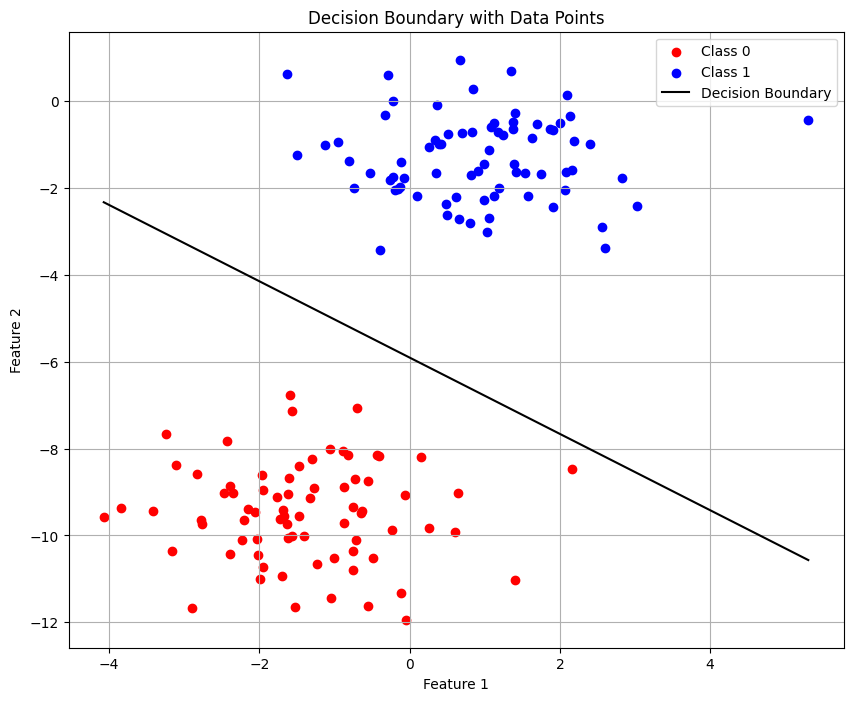

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
w_trained, _ = perceptron(X, y, lr=0.01, epochs=100)

# Plot decision boundary
plot_decision_boundary(X,y, w_trained)

**Exercice** **2**

**Imports**

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Génerer les données synthétiques**

In [ ]:
np.random.seed(0)

mu1 = np.array([-1, 0])
sigma1 = 1
mu2 = np.array([1, 0])
sigma2 = 1

X1 = np.random.normal(mu1, sigma1, size=(125, 2))
y1 = np.ones(125) * -1
X2 = np.random.normal(mu2, sigma2, size=(125, 2))
y2 = np.zeros(125)

X = np.vstack((X1, X2))
y = np.concatenate((y1, y2))

# Mélanger et diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

**Implémenter la fonction d'activation de Heaviside**

In [ ]:
def acti_func(z):
    return 1 if z > 0 else -1

**Implémenter l'algorithme du perceptron**

In [ ]:
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    w = np.zeros(n + 1)
    n_miss_list = []

    for epoch in range(epochs):
        n_miss = 0
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1)
            y_hat = acti_func(np.dot(x_i, w))
            if y_hat != y[idx]:
                w += lr * y[idx] * x_i
                n_miss += 1
        n_miss_list.append(n_miss)

    return w, n_miss_list

**Entraîner le perceptron**

In [ ]:
lr = 0.01
epochs = 100
w_trained, missing_list = perceptron(X_train, y_train, lr, epochs)
print(missing_list[-1])

102


**Tester la performance du perceptron sur l'ensemble de test**

In [ ]:
def predict(X, w):
    return np.array([acti_func(np.dot(np.insert(x, 0, 1), w)) for x in X])

y_pred = predict(X_test, w_trained)
accuracy = np.mean(y_pred == y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.54


**Tracer la limite de décision**

<ipython-input-51-d22b56d3d079>:3: RuntimeWarning: invalid value encountered in double_scalars
  m = -w1 / w2
<ipython-input-51-d22b56d3d079>:4: RuntimeWarning: invalid value encountered in double_scalars
  c = -w0 / w2


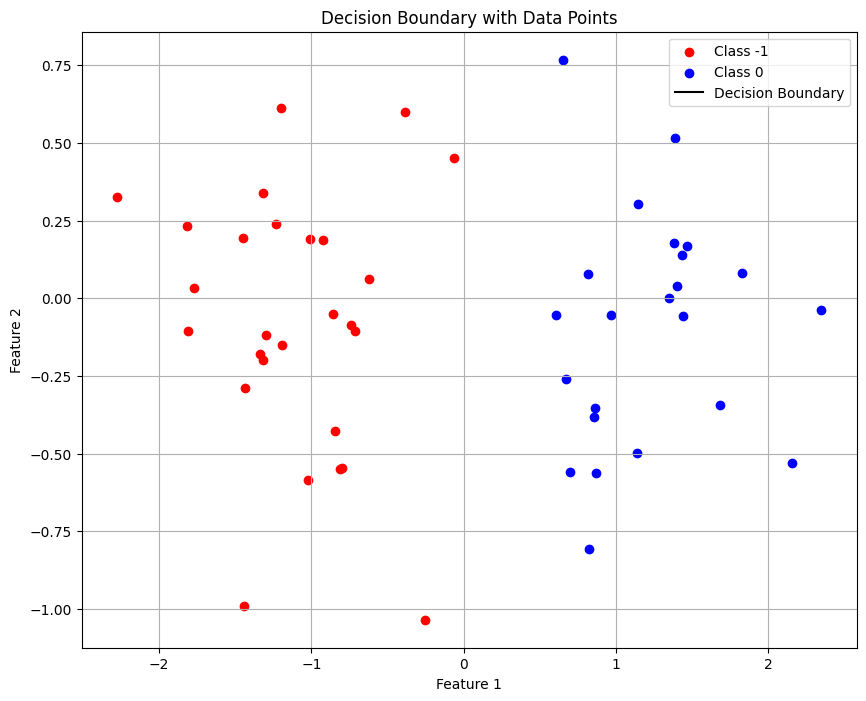

In [ ]:
def plot_decision_boundary(X, y, w):
    w0, w1, w2 = w[0], w[1], w[2]
    m = -w1 / w2
    c = -w0 / w2
    x1_boundary = [min(X[:,0]), max(X[:,0])]
    x2_boundary = m * np.array(x1_boundary) + c

    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1], color='red', label='Class -1')
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], color='blue', label='Class 0')
    plt.plot(x1_boundary, x2_boundary, 'k-', label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary with Data Points')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_test, y_test, w_trained)